In [26]:
!pip install seaborn --upgrade

In [36]:
!pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/e8/e2/2ddc273e726680a3c816f9a05c6726d57d61820fa7ab4753ed282d0a8bbe/cmdstanpy-1.2.0-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/93/e8/facde510585869b5ec694e8e0363ffe4eba067cb357a8398a55f6a1f8023/importlib_resources-6.1.1-py3-none-any.whl.metadata
  Obtaining dependency information for stanio~=0.3.0 from https://files.pythonhosted.org/packages/26/01/e2579afa3ad1eade8b54bf5b9e45790d219681b1f8f97edbd2f18c4e1a7d/stanio-0.3.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------

In [1]:
import seaborn
print(seaborn.__version__)

0.13.1


In [2]:
import tensorflow as tf
import numpy as np
import numpy
import matplotlib.pyplot as plt
#import pandas as pd
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.metrics import mean_squared_error
import sys, getopt
from keras import backend as K
import glob
import os
#import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
# Importing required libraries

import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [4]:
path = r'D:\data\sale in csv\sales20-23' # use your path
all_files = glob.glob(os.path.join(path, "*.csv"))

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)


In [5]:
Exchange_rate = pd.read_csv(r'D:\data\sale in csv\exchange.csv')
Kolkata_temp = pd.read_csv(r'D:\Users\House of Musa\kol_temp.csv')

In [6]:
Exchange_rate['Date'] = pd.to_datetime(Exchange_rate['Date'], format = '%Y-%m-%d')
Exchange_rate
Kolkata_temp['time'] = pd.to_datetime(Kolkata_temp['time'], format = '%Y-%m-%d')
Kolkata_temp

,time,tavg
0,2018-01-01,19.9
1,2018-01-02,19.3
2,2018-01-03,18.3
3,2018-01-04,16.7
4,2018-01-05,15.6
...,...,...
2167,2023-12-08,21.0
2168,2023-12-09,21.0
2169,2023-12-10,21.0
2170,2023-12-11,21.0


In [7]:
df['Total_Amt'] = (df['RSP'] * df['Bill_Qty']) - (df['Discount_Amt'])

In [8]:
print(df.Store.unique())

['CITIMART - CHOWRINGHEE' 'CITIMART - COOCH BEHAR' 'CITIMART - GARIAHAT'
 'CITIMART - HATIBAGAN' 'CITIMART - LAKE MALL' 'CITIMART - NEW MARKET'
 'CITIMART -BIDHAN ROAD' 'CITIMART -BURDWAN']


In [9]:
# splitting dataframe by Store location
# grouping by particular dataframe column
grouped = df.groupby(df.Store)
df1_CHOWRINGHEE = grouped.get_group("CITIMART - CHOWRINGHEE")
df1_NEWMARKET = grouped.get_group("CITIMART - NEW MARKET")
df1_HATIBAGAN = grouped.get_group("CITIMART - HATIBAGAN")
df1_GARIAHAT = grouped.get_group("CITIMART - GARIAHAT")

df_CHOWRINGHEE = df1_CHOWRINGHEE.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_NEWMARKET = df1_NEWMARKET.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_HATIBAGAN = df1_HATIBAGAN.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]
df_GARIAHAT = df1_GARIAHAT.loc[:, ['Bill_Date', 'DEPARTMENT', 'RSP', 'Bill_Qty', 'Discount_Amt', 'Total_Amt']]


In [10]:
len(pd.unique(df_CHOWRINGHEE['DEPARTMENT']))

605

In [11]:
df_CHOWRINGHEE.head()

,Bill_Date,DEPARTMENT,RSP,Bill_Qty,Discount_Amt,Total_Amt
0,2020-01-05,Imitation,249.0,1.0,0.0,249.0
1,2020-01-11,Toys,59.0,1.0,0.0,59.0
2,2020-01-23,Imitation,309.0,1.0,0.0,309.0
3,2020-01-23,Imitation,427.0,1.0,0.0,427.0
4,2020-01-05,Imitation,579.0,1.0,0.0,579.0


In [12]:
#STORE-CHOWRINGHEE
#grouped_chowringhee = df_CHOWRINGHEE.groupby(df_CHOWRINGHEE.DEPARTMENT)
grouped_chowringhee = df_NEWMARKET.groupby(df_NEWMARKET.DEPARTMENT)
#grouped_chowringhee = df_HATIBAGAN.groupby(df_HATIBAGAN.DEPARTMENT)

#MEN
df_CHOWRINGHEE_TshirtM = grouped_chowringhee.get_group('T-Shirts (M)')
df_CHOWRINGHEE_JeansM = grouped_chowringhee.get_group('Jeans (M)')
df_CHOWRINGHEE_FormalshirtM = grouped_chowringhee.get_group('Formal Shirts (M)')
df_CHOWRINGHEE_CasualshirtM = grouped_chowringhee.get_group('Casual Shirts (M)')
df_CHOWRINGHEE_CasualtrouserM = grouped_chowringhee.get_group('Casual Trouser (M)')
df_CHOWRINGHEE_BermundasM = grouped_chowringhee.get_group('Bermudas (M)')
df_CHOWRINGHEE_JacketM = grouped_chowringhee.get_group('Jacket (M)')
df_CHOWRINGHEE_PulloverM = grouped_chowringhee.get_group('Pullover (M)')
df_CHOWRINGHEE_PyajamaM = grouped_chowringhee.get_group('Pyajama (M)')
df_CHOWRINGHEE_FormaltrouserM = grouped_chowringhee.get_group('Formal Trouser (M)')
df_CHOWRINGHEE_LingeriesM = grouped_chowringhee.get_group('Lingeries (M)')
df_CHOWRINGHEE_SweaterstM = grouped_chowringhee.get_group('Sweaters (M)')
df_CHOWRINGHEE_BlazerM = grouped_chowringhee.get_group('Blazer (M)')

#LADIES
df_CHOWRINGHEE_KurtiL = grouped_chowringhee.get_group('Kurti (L)')
df_CHOWRINGHEE_JeansL = grouped_chowringhee.get_group('Jeans (L)')
df_CHOWRINGHEE_TopL = grouped_chowringhee.get_group('Top (L)')
df_CHOWRINGHEE_SalwarsuitL = grouped_chowringhee.get_group('Salwar Suit (L)')
df_CHOWRINGHEE_TshirtL = grouped_chowringhee.get_group('T-Shirt (L)')
df_CHOWRINGHEE_ShirtL = grouped_chowringhee.get_group('Shirt (L)')
df_CHOWRINGHEE_PlazoL = grouped_chowringhee.get_group('Plazo (L)')
df_CHOWRINGHEE_TrousersL = grouped_chowringhee.get_group('Trousers (L)')
df_CHOWRINGHEE_SweatersL = grouped_chowringhee.get_group('Sweaters (L)')
#df_CHOWRINGHEE_DressesL = grouped_chowringhee.get_group('Dress (L)')
df_CHOWRINGHEE_SkirtsL = grouped_chowringhee.get_group('Skirts (L)')
df_CHOWRINGHEE_PulloverL = grouped_chowringhee.get_group('Pullover (L)')
df_CHOWRINGHEE_JacketL = grouped_chowringhee.get_group('Jacket (L)')
df_CHOWRINGHEE_NightyL = grouped_chowringhee.get_group('Nighty (L)')
df_CHOWRINGHEE_HalfpantL = grouped_chowringhee.get_group('Half Pant (L)')
df_CHOWRINGHEE_LeggingsL = grouped_chowringhee.get_group('Leggings (L)')
df_CHOWRINGHEE_LachaL = grouped_chowringhee.get_group('Lacha (L)')
df_CHOWRINGHEE_CapriL = grouped_chowringhee.get_group('Capri (L)')
df_CHOWRINGHEE_ParallelL = grouped_chowringhee.get_group('Parallel (L)')
df_CHOWRINGHEE_TunicL = grouped_chowringhee.get_group('Tunic (L)')
df_CHOWRINGHEE_StoleL = grouped_chowringhee.get_group('Stole (L)')
df_CHOWRINGHEE_SareeCotton = grouped_chowringhee.get_group('Cotton')
df_CHOWRINGHEE_SareeTant = grouped_chowringhee.get_group('Tant')
df_CHOWRINGHEE_SareeSynthetics = grouped_chowringhee.get_group('Synthetics')
df_CHOWRINGHEE_SareeEmbroidery = grouped_chowringhee.get_group('Embroidery')
df_CHOWRINGHEE_SareePremiume = grouped_chowringhee.get_group('Premiume')
df_CHOWRINGHEE_Fancy = grouped_chowringhee.get_group('Fancy')

#GIRLS
df_CHOWRINGHEE_FrockG = grouped_chowringhee.get_group('Frock (G)')
df_CHOWRINGHEE_TopG = grouped_chowringhee.get_group('Top (G)')
df_CHOWRINGHEE_CaprisetG = grouped_chowringhee.get_group('Capri Set (G)')
df_CHOWRINGHEE_JeansG = grouped_chowringhee.get_group('Jeans (G)')
df_CHOWRINGHEE_TshirtG = grouped_chowringhee.get_group('T-Shirt (G)')
df_CHOWRINGHEE_HalfpantG = grouped_chowringhee.get_group('Half Pant (G)')
df_CHOWRINGHEE_SkirttopsetG = grouped_chowringhee.get_group('Skirt Top Set (G)')
df_CHOWRINGHEE_CapriG = grouped_chowringhee.get_group('Capri (G)')
df_CHOWRINGHEE_HalfPantSetG = grouped_chowringhee.get_group('Half Pant Set (G)')
df_CHOWRINGHEE_SkirtsG = grouped_chowringhee.get_group('Skirts (G)')
df_CHOWRINGHEE_PulloverG = grouped_chowringhee.get_group('Pullover (G)')
df_CHOWRINGHEE_SweaterG = grouped_chowringhee.get_group('Sweater (G)')
df_CHOWRINGHEE_Plazo = grouped_chowringhee.get_group('Plazo (G)')
df_CHOWRINGHEE_JacketG = grouped_chowringhee.get_group('Jacket (G)')
df_CHOWRINGHEE_JeggingsG = grouped_chowringhee.get_group('Jeggings (G)')

#BOYS
df_CHOWRINGHEE_TshirtB = grouped_chowringhee.get_group('T-Shirt (B)')
df_CHOWRINGHEE_BabasuitB = grouped_chowringhee.get_group('Baba Suit (B)')
df_CHOWRINGHEE_ShirtB = grouped_chowringhee.get_group('Shirt (B)')
df_CHOWRINGHEE_JeansB = grouped_chowringhee.get_group('Jeans (B)')
df_CHOWRINGHEE_TrouserB = grouped_chowringhee.get_group('Trouser (B)')
df_CHOWRINGHEE_CapriB = grouped_chowringhee.get_group('Capri (B)')
df_CHOWRINGHEE_HalfpantB = grouped_chowringhee.get_group('Half Pant (B)')
df_CHOWRINGHEE_PulloverB = grouped_chowringhee.get_group('Pullover (B)')
df_CHOWRINGHEE_JacketB = grouped_chowringhee.get_group('Jacket (B)')

#OTHERS
df_CHOWRINGHEE_Dressmaterial = grouped_chowringhee.get_group('Dress Material')

df_CHOWRINGHEE_Bedsheets = grouped_chowringhee.get_group('Bed Sheets')
df_CHOWRINGHEE_Sweets = grouped_chowringhee.get_group('Sweets')
df_CHOWRINGHEE_Deo = grouped_chowringhee.get_group('Deo')
#df_CHOWRINGHEE_Whiskey = grouped_chowringhee.get_group('Whisky')
df_CHOWRINGHEE_Towel = grouped_chowringhee.get_group('Towel')
df_CHOWRINGHEE_Chappal = grouped_chowringhee.get_group('Chappal')
df_CHOWRINGHEE_Kashmiriswals = grouped_chowringhee.get_group('Kashmiri Swals')
df_CHOWRINGHEE_Novelties = grouped_chowringhee.get_group('Novelties')
df_CHOWRINGHEE_sportsshoe = grouped_chowringhee.get_group('Sports Shoe')
df_CHOWRINGHEE_Hairshampoo = grouped_chowringhee.get_group('Hair Shampoo')
df_CHOWRINGHEE_Perfumes = grouped_chowringhee.get_group('Perfumes')
df_CHOWRINGHEE_Stationary = grouped_chowringhee.get_group('Stationary')

df_CHOWRINGHEE_Facewash = grouped_chowringhee.get_group('Facewash')
df_CHOWRINGHEE_TrollyBag = grouped_chowringhee.get_group('Trolly Bag')
df_CHOWRINGHEE_Shoe = grouped_chowringhee.get_group('Shoe')
df_CHOWRINGHEE_Toys = grouped_chowringhee.get_group('Toys')
df_CHOWRINGHEE_Bag = grouped_chowringhee.get_group('Bag')

df_CHOWRINGHEE_FridgeBottle = grouped_chowringhee.get_group('Fridge Bottle')
df_CHOWRINGHEE_Blankets = grouped_chowringhee.get_group('Blankets')
df_CHOWRINGHEE_Imitation = grouped_chowringhee.get_group('Imitation')
#df_CHOWRINGHEE_LipSticks = grouped_chowringhee.get_group('Lip Sticks')
df_CHOWRINGHEE_SkinCream = grouped_chowringhee.get_group('Skin Cream')
df_CHOWRINGHEE_Soap = grouped_chowringhee.get_group('Soap')
df_CHOWRINGHEE_Other = grouped_chowringhee.get_group('Other')
df_CHOWRINGHEE_BabyAccessory = grouped_chowringhee.get_group('Baby Accessory')
df_CHOWRINGHEE_LiquidConcentrates = grouped_chowringhee.get_group('Liquid Concentrates')
#df_CHOWRINGHEE_Foundation = grouped_chowringhee.get_group('Foundation')
df_CHOWRINGHEE_Bra = grouped_chowringhee.get_group('Bra')
df_CHOWRINGHEE_Confectionery = grouped_chowringhee.get_group('CONFECTIONERY')
df_CHOWRINGHEE_Belt = grouped_chowringhee.get_group('Belt')
df_CHOWRINGHEE_DryFlower = grouped_chowringhee.get_group('Dry Flower')
df_CHOWRINGHEE_Sandal = grouped_chowringhee.get_group('Sandal')
df_CHOWRINGHEE_Curtains = grouped_chowringhee.get_group('Curtains')
#df_CHOWRINGHEE_LipColour = grouped_chowringhee.get_group('Lip Colour')
df_CHOWRINGHEE_Container = grouped_chowringhee.get_group('Container')
df_CHOWRINGHEE_SchoolBag = grouped_chowringhee.get_group('School Bag')



#Kids
#df_CHOWRINGHEE_BombabyK = grouped_chowringhee.get_group('Bom Baby (K)')
df_CHOWRINGHEE_TshirtRm = grouped_chowringhee.get_group('T-Shirts (Rm)')

#FOOD
df_CHOWRINGHEE_InstantNoodles = grouped_chowringhee.get_group('INSTANT NOODLES')
df_CHOWRINGHEE_Sauces = grouped_chowringhee.get_group('Sauces')
df_CHOWRINGHEE_CtcTea = grouped_chowringhee.get_group('Ctc Tea')
df_CHOWRINGHEE_FruitBasedJuices = grouped_chowringhee.get_group('Fruit Based Juices')
df_CHOWRINGHEE_Pickles = grouped_chowringhee.get_group('Pickles')
df_CHOWRINGHEE_SugarBoilesChocolates = grouped_chowringhee.get_group('Sugar Boiled Chocolates')
df_CHOWRINGHEE_NINamkeens = grouped_chowringhee.get_group('N.I.Namkeens')
df_CHOWRINGHEE_Jams = grouped_chowringhee.get_group('Jams')
df_CHOWRINGHEE_ChineseNoodles = grouped_chowringhee.get_group('CHINESE NOODLES')
df_CHOWRINGHEE_Cookies = grouped_chowringhee.get_group('Cookies')


In [13]:
df1 = df_CHOWRINGHEE_TshirtM.loc[:, ['Bill_Date', 'RSP', 'Bill_Qty', 'Total_Amt']]
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1['Bill_Date'] = pd.to_datetime(df1['Bill_Date'], format='%Y-%m-%d')
df1_sort = df1.sort_values('Bill_Date', ascending=True)
df1_sort

,Bill_Date,RSP,Bill_Qty,Total_Amt
123262,2020-01-01,569.0,1.0,569.0
125166,2020-01-01,329.0,1.0,329.0
123203,2020-01-01,349.0,1.0,349.0
125653,2020-01-01,329.0,1.0,329.0
125652,2020-01-01,299.0,1.0,299.0
...,...,...,...,...
4996327,2023-12-12,699.0,1.0,699.0
4996324,2023-12-12,699.0,1.0,699.0
4996412,2023-12-12,529.0,1.0,529.0
4996381,2023-12-12,549.0,1.0,549.0


In [14]:
# first create a DataFrame with all dates between specified start<-->end using pd.date_range()
all_dates = pd.DataFrame(pd.date_range(df1_sort['Bill_Date'].min(), df1_sort['Bill_Date'].max()), columns=['Bill_Date'])

# from the all_dates DataFrame, left join onto the DataFrame with missing dates
new_df = all_dates.merge(right=df1_sort, how='left', on='Bill_Date')
print(len(pd.unique(new_df['Bill_Date'])))
new_df.tail(15)
new_df.isnull().sum()

1442


Bill_Date     0
RSP          94
Bill_Qty     94
Total_Amt    94
dtype: int64

In [15]:
df_a = new_df.groupby('Bill_Date').agg(Total_Qty=('Bill_Qty', 'sum'),
                            RSP_AVG=('RSP', 'mean'),
                            Total_Amt=('Total_Amt', 'sum')).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
df_a
df_exchange = df_a.merge(Exchange_rate, left_on = 'Bill_Date', right_on = 'Date')
df_ex_temp = df_exchange.merge(Kolkata_temp, left_on = 'Bill_Date', right_on = 'time')
df_f = df_ex_temp.loc[:, [ 'Bill_Date', 'Total_Amt', 'Total_Qty', 'RSP_AVG', 'Price', 'tavg']]
df_f.head()

,Bill_Date,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
0,2020-01-01,25021.8,63.0,424.172414,71.227,18.7
1,2020-01-02,26747.8,61.0,496.118644,71.350,20.3
2,2020-01-03,13356.0,32.0,509.000000,71.770,17.5
3,2020-01-06,17671.6,40.0,457.048780,71.867,17.0
4,2020-01-07,7954.5,17.0,509.000000,71.845,16.7


In [89]:
df_daily = df_f.resample('D').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean'}).reset_index().rename(columns={'Bill_Date': 'Bill_Date'})
#df_daily

In [90]:
df_f_m = df_daily
df_f_m.index = pd.to_datetime(df_f_m.Bill_Date)
df_f_m.head(3)

,Bill_Date,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
Bill_Date,,,,,,
2020-01-01,2020-01-01,25021.8,63.0,424.172414,71.227,18.7
2020-01-02,2020-01-02,26747.8,61.0,496.118644,71.350,20.3
2020-01-03,2020-01-03,13356.0,32.0,509.000000,71.770,17.5


In [91]:
df_monthly = df_daily.resample('M').agg({"Total_Amt":'sum',"Total_Qty":'sum',"RSP_AVG":'mean',"Price":'mean',"tavg":'mean'})
df_monthly.head(3)

,Total_Amt,Total_Qty,RSP_AVG,Price,tavg
Bill_Date,,,,,
2020-01-31,577091.00,1374.0,475.714003,71.267870,18.991304
2020-02-29,1403296.65,5487.0,282.406332,71.536150,21.425000
2020-03-31,1369107.69,4518.0,335.554492,74.564955,27.045455


In [41]:
# Data Preparation: input should be float type
df_f_m['Total_Amt'] = df_f_m['Total_Amt'] * 1.0
# Assigning one store from each category
sales_a = df_f_m['Total_Amt']
sales_a.head()


Bill_Date
2020-01-01    25021.8
2020-01-02    26747.8
2020-01-03    13356.0
2020-01-04        0.0
2020-01-05        0.0
Name: Total_Amt, dtype: float64

<Axes: xlabel='Bill_Date'>

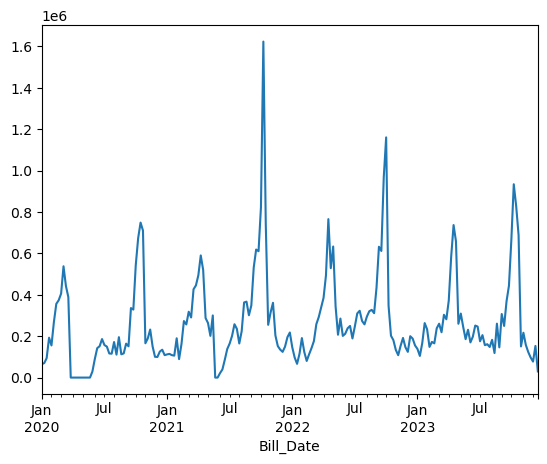

In [42]:
# Trend
sales_a.resample('W').sum().plot()

In [67]:
sales_a.head()

Bill_Date
2020-01-01    25021.8
2020-01-02    26747.8
2020-01-03    13356.0
2020-01-04        0.0
2020-01-05        0.0
Name: Total_Amt, dtype: float64

In [43]:
#Stationarity of Time Series
#In order to use time series forecasting models, we need to ensure that our time series data is stationary i.e constant mean, 
#constant variance and constant covariance with time.
#There are 2 ways to test the stationarity of time series:
#a) Rolling Mean: A rolling analysis of a time series model is often used to assess the model’s stability over time. 
#The window is rolled (slid across the data) on a weekly basis, in which the average is taken on a weekly basis. 
#Rolling Statistics is a visualization test, where we can compare the original data with the rolled data and check if 
#the data is stationary or not.

#b) Dicky -Fuller test: This test provides us the statistical data such as p-value to understand whether we can reject 
#the null hypothesis. The null hypothesis is that data is not stationary and the alternative hypothesis says that data is
#stationary. If the p-value is less than the critical value (say 0.5), we will reject the null hypothesis and say that data 
#is stationary.
#Let’s check the stationarity 

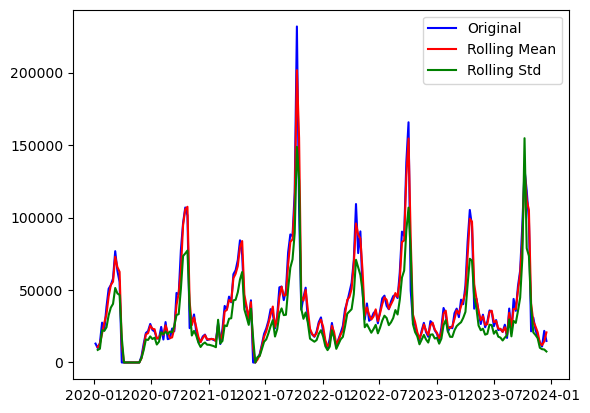

Results of Dickey-Fuller Test:
ADF Statistic: -5.098151
p-value: 0.000014
Critical Values:
1% -3.4349634933241084
5% -2.8635775363009244
10% -2.5678547733584605


In [44]:
# Function to test the stationarity
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    roll_mean = timeseries.rolling(window=7).mean()
    roll_std = timeseries.rolling(window=7).std()
# Plotting rolling statistics:
    orig = plt.plot(timeseries.resample('W').mean(), color='blue',label='Original')
    mean = plt.plot(roll_mean.resample('W').mean(), color='red', label='Rolling Mean')
    std = plt.plot(roll_std.resample('W').mean(), color='green', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.show(block=False)
    
  # Performing Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
           print(key, value)
# Testing stationarity of store type a
test_stationarity(sales_a)


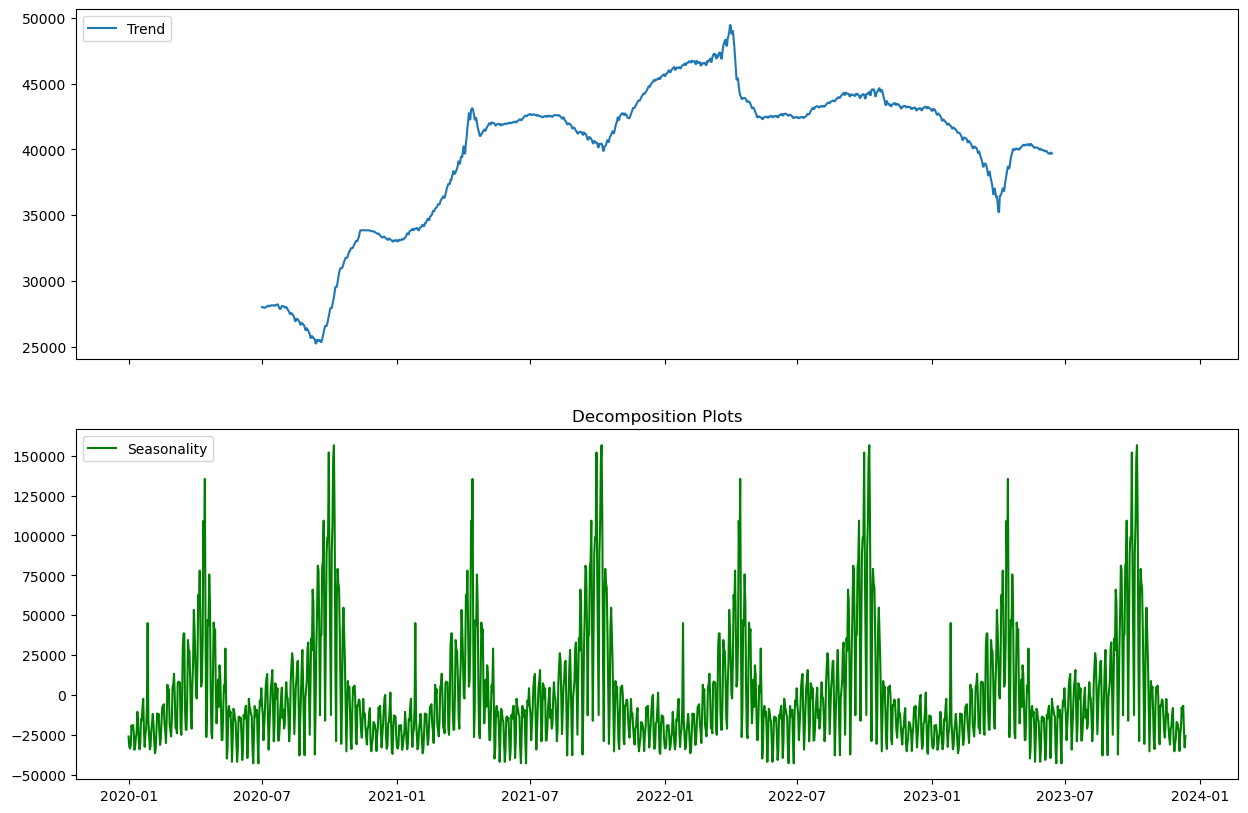

In [45]:
# Plotting seasonality and trend
def plot_timeseries(sales_a):

    fig, axes = plt.subplots(2, 1, sharex=True, sharey=False)
    fig.set_figheight(10)
    fig.set_figwidth(15)
    decomposition= seasonal_decompose(sales_a, model = 'additive', period = 365)
    estimated_trend = decomposition.trend
    estimated_seasonal = decomposition.seasonal
    estimated_residual = decomposition.resid
    
    axes[1].plot(estimated_seasonal, 'g', label='Seasonality')
    axes[1].legend(loc='upper left');
    
    axes[0].plot(estimated_trend, label='Trend')
    axes[0].legend(loc='upper left');
    plt.title('Decomposition Plots')

plot_timeseries(sales_a)

In [46]:
#From the above plots, we can see that there are seasonality and trend present in our data. So, we’ll use the forecasting models
#that take both of these factors into consideration.

#Evaluation Metrics
#There are two popular metrics used in measuring the performance of regression (continuous variable) models i.e MAE & RMSE.

#MAE is easier to understand and interpret but RMSE works well in situations where large errors are undesirable. 
#This is because the errors are squared before they are averaged, thus penalizing large errors. In our case, 
#RMSE suits well because we want to predict the sales with minimum error (i.e penalize high errors) so that inventory
#can be managed properly.

#So, we’ll choose RMSE as a metric to measure the performance of our models.

#2. Predictive Modelling



In [47]:
# Autocorrelation function to make ACF and PACF graphs
def auto_corr(sales_a):
    lag_acf = acf(sales_a,nlags=30)
    lag_pacf = pacf(sales_a,nlags=20,method='ols')
  
    plt.subplot(121)
    plt.plot(lag_acf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('ACF')
    
    plt.subplot(122)
    plt.plot(lag_pacf)
    plt.axhline(y=0,linestyle='--',color ='red')
    plt.axhline(y=1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.axhline(y=-1.96/np.sqrt(len(sales_a)),linestyle='--',color ='red')
    plt.title('PACF')

In [ ]:
#To find the values of p, d and q - we use Autocorrelation function (ACF) and Partial Autocorrelation (PACF) plots.
#ACF - measure of correlation between time series with a lagged version of itself. PACF - measure of correlation between 
#time series with a lagged version of itself but after eliminating the variations already explained by the intervening comparison.
#p value is the value on x-axis of PACF where the plot crosses the upper Confidence Interval for the first time. q value is 
#the value on x-axis of ACF where the plot crosses the upper Confidence Interval for the first time.

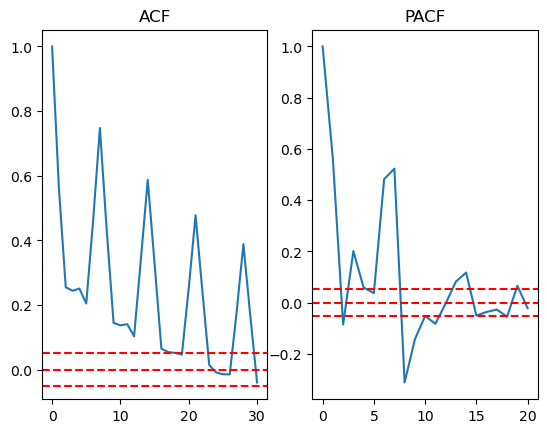

In [48]:
# ACF and PACF for store type a
auto_corr(sales_a)


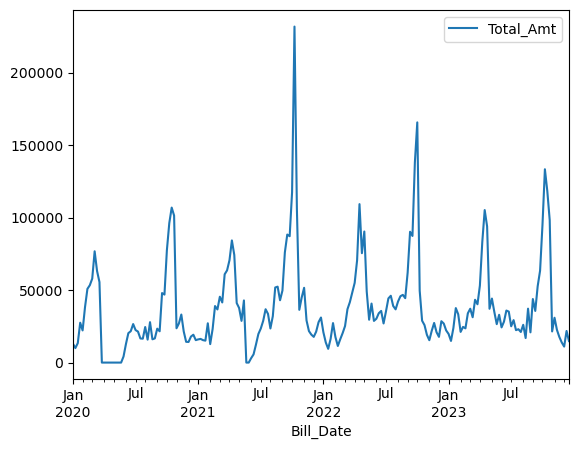

In [68]:
# Summing sales on per week basis
train_arima = df_daily.resample("W").mean() 
train_arima = train_arima[["Total_Amt"]]
train_arima.plot();

In [70]:
#Model 1: Autoregressive Integrated Moving Average (ARIMA)
#We will use one of the most commonly used methods for time-series forecasting, known as ARIMA.
#ARIMA models are denoted by ARIMA(p, d, q).

#p, d, and q represent seasonality, trend, and noise in data respectively. We’ll first create all possible 
#combinations of p, d, and q as follows:

# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 2)
# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))
# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA: ')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA: 
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [71]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train_arima,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5041.794785235355
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4731.25378029704
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4737.415168162553
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4363.77557464965
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4714.576121059119
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4632.840036608045
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4359.485401873744
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4320.74319076406
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4880.074002105275
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:4589.374431392281
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4597.324600788806
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4258.781363376356
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4629.665815118491
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4562.3734700004825
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4312.265295364425
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4256.73006887239
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:4681.173232033067
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4413.151299519855
ARIMA(0, 1, 0

In [72]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model_sarima.fit()

print(results_sarima.summary().tables[1])



                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0274      0.052      0.526      0.599      -0.075       0.130
ma.S.L12      -0.9443      0.066    -14.304      0.000      -1.074      -0.815
sigma2      9.218e+08   2.96e-11   3.11e+19      0.000    9.22e+08    9.22e+08


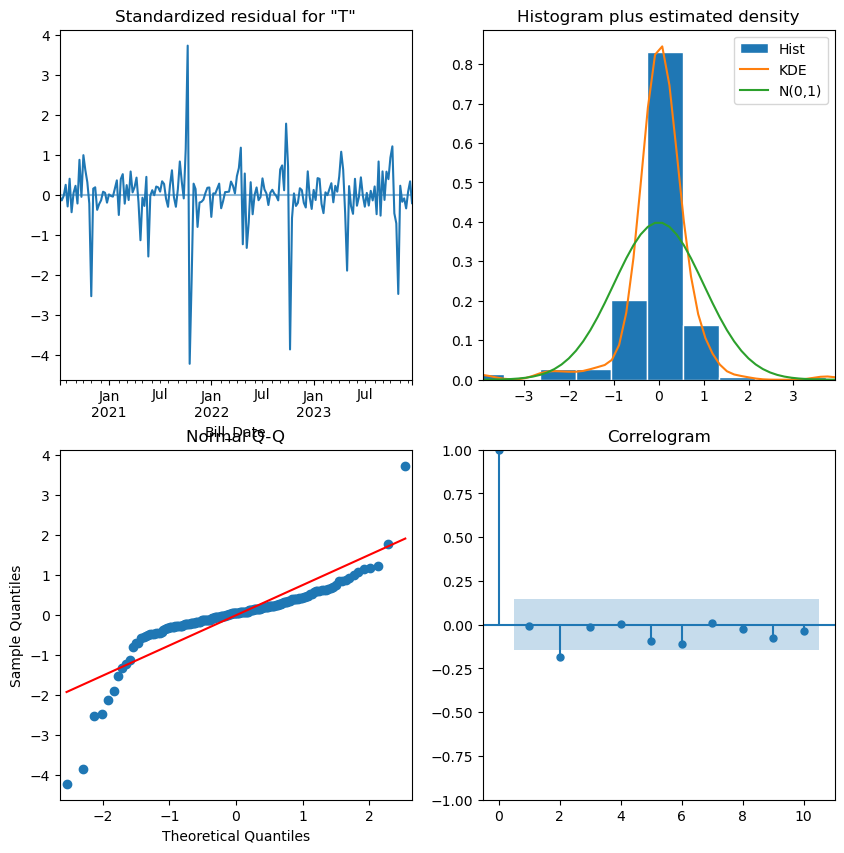

In [73]:
# Checking diagnostic plots
results_sarima.plot_diagnostics(figsize=(10, 10))
plt.show()

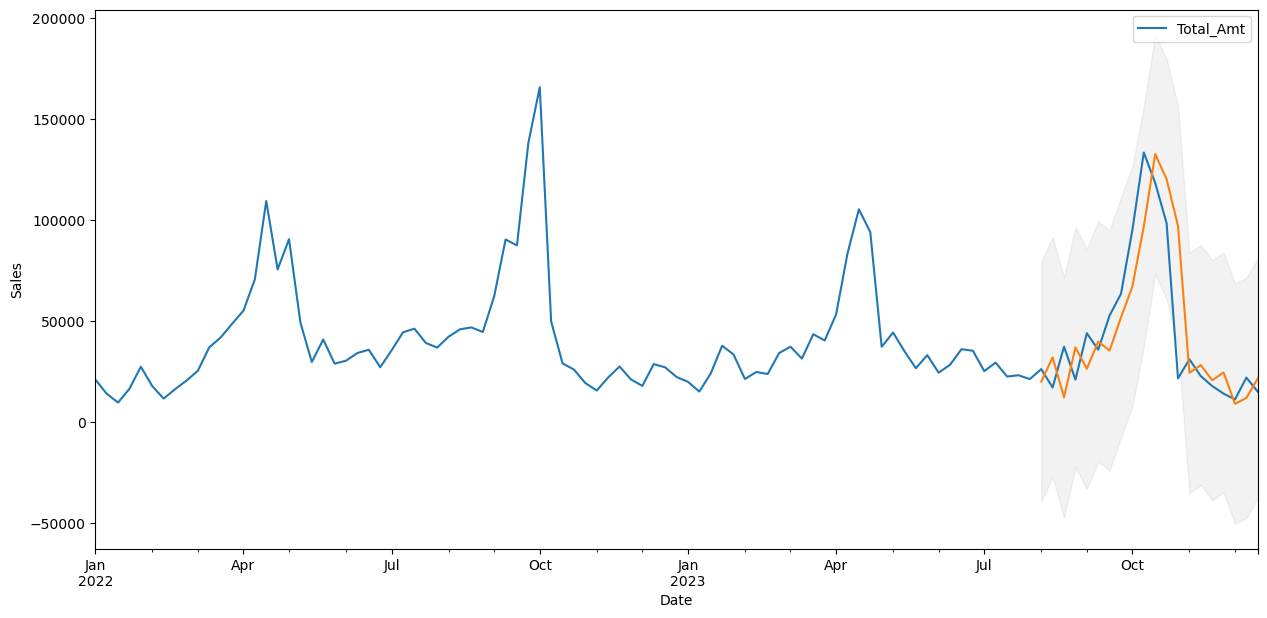

Root Mean Squared Error:  23198.802899159335


In [82]:
# Model Prediction and validation 
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.

pred = results_sarima.get_prediction(start=pd.to_datetime('2023-08-06'), dynamic = False) 

# Get confidence intervals of forecasts
pred_ci = pred.conf_int() 

ax = train_arima["2022":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima["2023-08-06":]

# Calculating the error
rms_arima = sqrt(mean_squared_error(train_arima_truth, train_arima_forecasted))
print("Root Mean Squared Error: ", rms_arima)

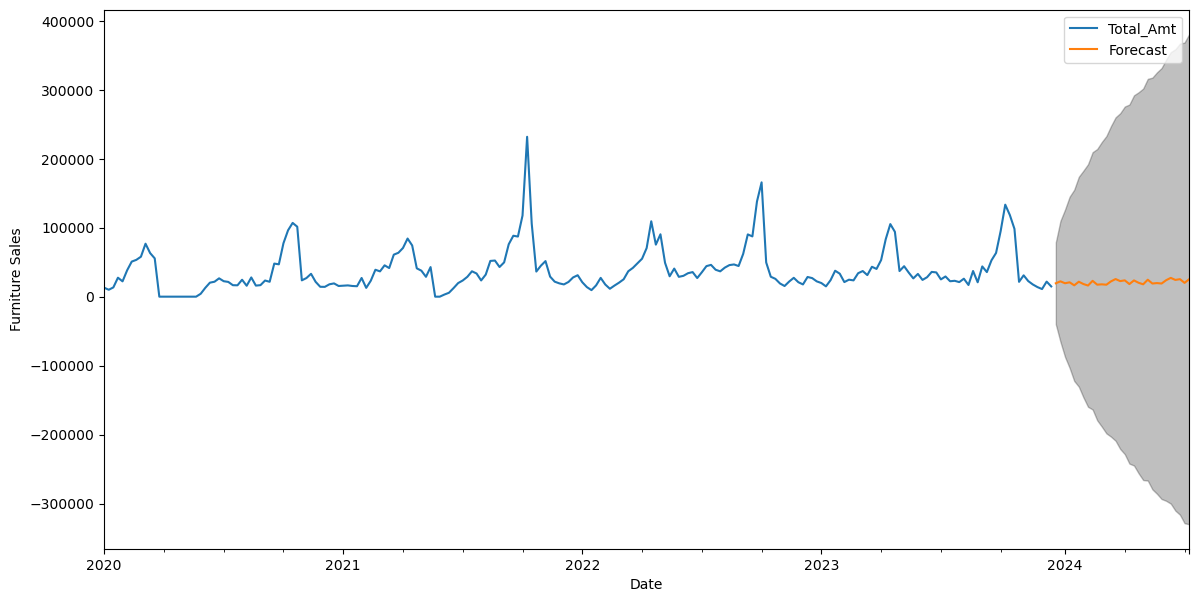

In [85]:
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int()

ax = train_arima.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')

plt.legend()
plt.show()

In [88]:
pred_uc

In [92]:
#pred_ci